In [15]:
import bilby 

from scipy import stats
from scipy.interpolate import interp2d,CloughTocher2DInterpolator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
# Fix the y ticks 
from matplotlib.ticker import ScalarFormatter

In [16]:
import matplotlib.style

matplotlib.style.use('./publication.mplstyle')
matplotlib.style.available
plt.rcParams['axes.grid'] = False

In [17]:
# Read in the prior 
# The BNS data with GW constraints
df = pd.read_csv('./MCL_BNS_new.dat',delim_whitespace=True)

mass = df['mass'].tolist()
tides = df['tides'].tolist()
prob = df['prob'].tolist()
prob2 = np.array(prob)
tides2 = np.array(tides)
mass2 = np.array(mass)

0.9999999961086156


Text(0.5, 0, '$\\Lambda$')

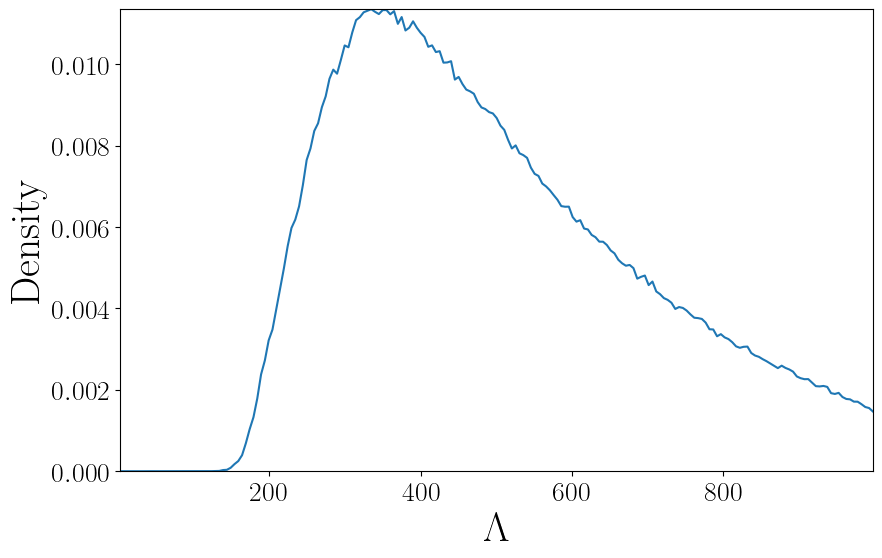

In [18]:

mass2 = np.array(mass2)
tides2 = np.array(tides2)
prob2 = np.array(prob2)

# Normalise probability 
prob_total2 = sum(prob2)
print(prob_total2)
prob2 = np.array(prob2)/prob_total2

# Create a grid for the points
points = np.column_stack((mass2, tides2))
mass_sort2=np.sort(np.unique(mass2))
tides_sort2=np.sort(np.unique(tides2))

f_interp = CloughTocher2DInterpolator(points,prob2)
chirp_mass = 1.2188

y0_tmp = np.tile(chirp_mass,len(tides_sort2))

yy = f_interp(y0_tmp,tides_sort2)
# Normalise 
yy = yy/np.sum(yy)


# Plot the prior for lambda_tilde sliced along the chirp mass of GW170817
plt.plot(tides_sort2,yy)
plt.ylabel('Density')
plt.margins(x=0,y=0)
plt.xlabel(r'$\Lambda$')

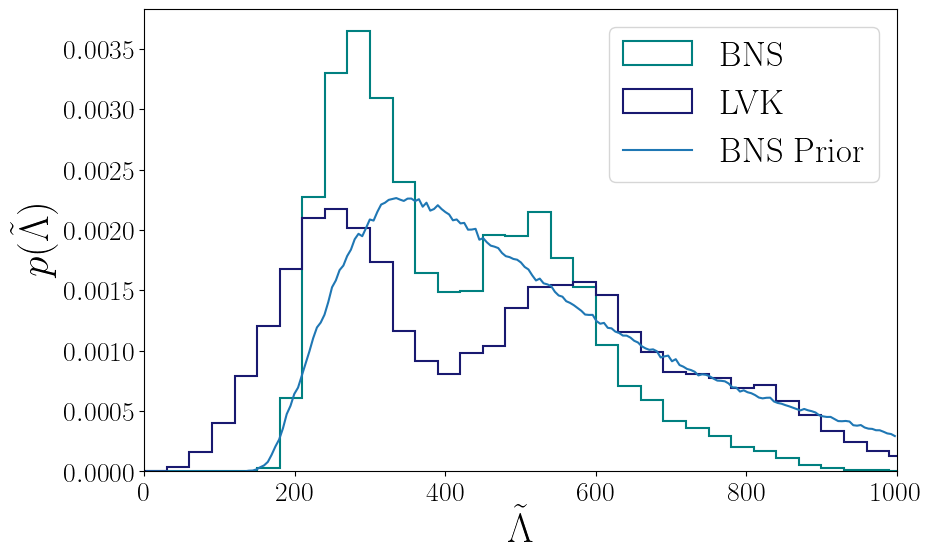

In [19]:
# Read in CSV files containing the posterior samples on lambda_tilde and chrip mass
# These have been extract from either the bilby result or a HDF5 file 
NSBH_samples = "GW170817_NSBH_posterior_samples.csv"
BNS_samples = "GW170817_posterior_samples.csv"
official_samples = "GW170817_official_posterior_samples.csv"


BNS_df = pd.read_csv(BNS_samples)
NSBH_df = pd.read_csv(NSBH_samples)
official_df = pd.read_csv(official_samples)
mass_BNS = BNS_df['chirp_mass_source'].tolist()
tides_BNS = BNS_df['lambda_tilde'].tolist()
mass_NSBH = NSBH_df['chirp_mass_source'].tolist()
tides_NSBH = NSBH_df['lambda_tilde'].tolist()
mass_official = official_df['chirp_mass_source'].tolist()
tides_official = official_df['lambda_tilde'].tolist()



binwidth=30

plt.hist(tides_BNS, bins=range(0, 1000 + binwidth, binwidth),density=True,histtype='step',label='BNS',color='teal',linewidth=1.5)
plt.hist(tides_official,bins=range(0, 5000 + binwidth, binwidth),density=True,histtype='step',label='LVK',color='midnightblue',linewidth=1.5)
yy_normalized = yy / np.trapz(yy, tides_sort2)  # Normalize using the integral (area under curve = 1)
plt.plot(tides_sort2, yy_normalized, label=' BNS Prior')

# Fix the y ticks
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xlabel(r'$\tilde{\Lambda}$')
plt.ylabel(r'$p({\tilde{\Lambda}})$')
plt.xlim(0,1000)
plt.legend()
plt.savefig('Fig_2_GW170817_lambda_tilde_posteriors_BNS.pdf',dpi=500,bbox_inches='tight')
plt.show()
plt.close()

1.0000000013550974


Text(0.5, 0, '$\\Lambda$')

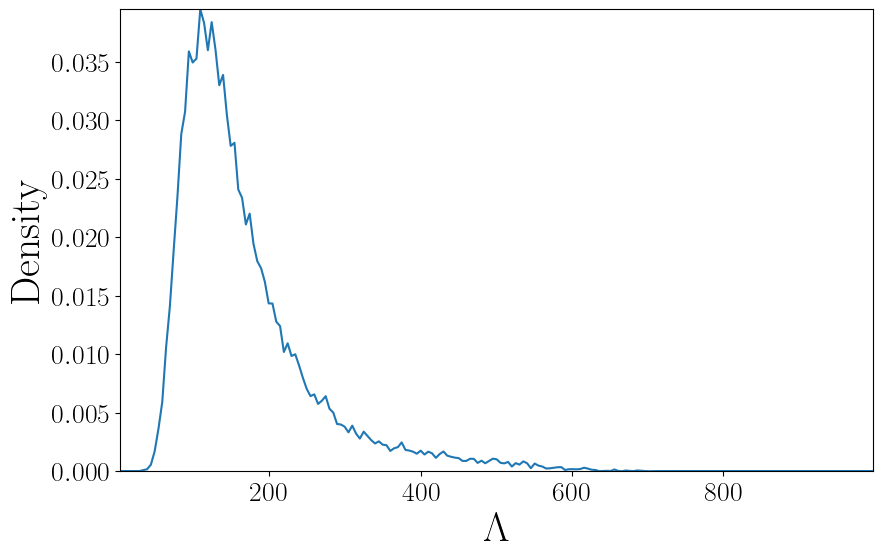

In [20]:
# Define the NSBH prior 
# Read in the prior 
# The BNS data with GW constraints
df = pd.read_csv('./MCL_NSBH_new.dat',delim_whitespace=True)

mass = df['mass'].tolist()

tides = df['tides'].tolist()
prob = df['prob'].tolist()
prob2 = np.array(prob)
tides2 = np.array(tides)
mass2 = np.array(mass)


mass2 = np.array(mass2)
tides2 = np.array(tides2)
prob2 = np.array(prob2)

# Normalise probability 
prob_total2 = sum(prob2)
print(prob_total2)
prob2 = np.array(prob2)/prob_total2

# Create a grid for the points
points = np.column_stack((mass2, tides2))
mass_sort2=np.sort(np.unique(mass2))
tides_sort2=np.sort(np.unique(tides2))

f_interp = CloughTocher2DInterpolator(points,prob2)
chirp_mass = 1.2188

y0_tmp = np.tile(chirp_mass,len(tides_sort2))

yy = f_interp(y0_tmp,tides_sort2)
# Normalise 
yy = yy/np.sum(yy)


# Plot the prior for lambda_tilde sliced along the chirp mass of GW170817
plt.plot(tides_sort2,yy)
plt.ylabel('Density')
plt.margins(x=0,y=0)
plt.xlabel(r'$\Lambda$')

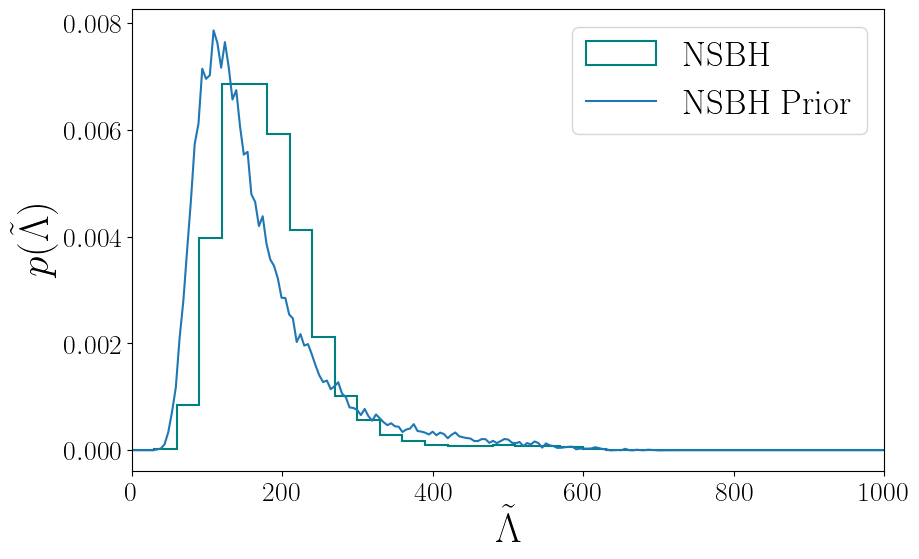

In [21]:
# Plot the NSBH 
binwidth=30

plt.hist(tides_NSBH, bins=range(0, 1000 + binwidth, binwidth),density=True,histtype='step',label='NSBH',color='teal',linewidth=1.5)
#plt.hist(tides_official,bins=range(0, 5000 + binwidth, binwidth),density=True,histtype='step',label='LVK',color='midnightblue',linewidth=1.5)
yy_normalized = yy / np.trapz(yy, tides_sort2)  # Normalize using the integral (area under curve = 1)
plt.plot(tides_sort2, yy_normalized, label=' NSBH Prior')

# Fix the y ticks
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xlabel(r'$\tilde{\Lambda}$')
plt.ylabel(r'$p({\tilde{\Lambda}})$')
plt.xlim(0,1000)
plt.legend()
plt.savefig('GW170817_lambda_tilde_posteriors_NSBH.pdf',dpi=500,bbox_inches='tight')
plt.show()
plt.close()